In [4]:
#Kütüphanelerle basliyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Veriyi cekiyoruz
Data1=pd.read_excel("maaslar.xlsx")

In [6]:
Data1


,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [7]:
#Egitim seviyesi yazdığı için ünvanı almıyoruz.
x=Data1.iloc[:,1:2].values
y=Data1.iloc[:,2:3].values

In [8]:
#Regresyon modelerini görseleştirerek daha iyi kavramaya calisiyoruz
from sklearn.linear_model import LinearRegression

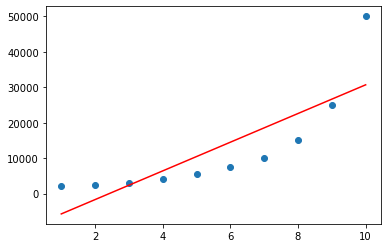

In [9]:
#veriyi görselestiriyoruz..
lin_reg=LinearRegression()
lin_reg.fit(x,y)
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color="red")

In [10]:
from sklearn.preprocessing import PolynomialFeatures

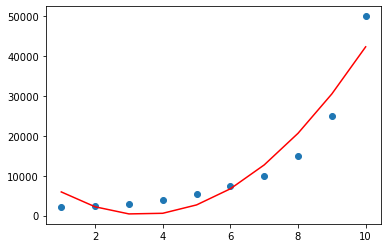

In [11]:
lin_poly=PolynomialFeatures(degree=2)#degree yi atirarak regresyon cizgisini daha çok bükebiliriz
X=lin_poly.fit_transform(x)
lin_reg2=LinearRegression()
lin_reg2.fit(X,y)
plt.scatter(x,y)
plt.plot(x,lin_reg2.predict(X),"red")

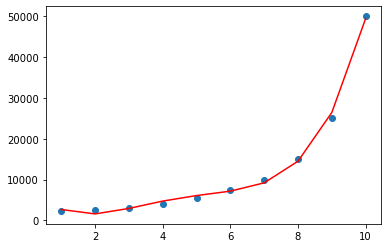

In [12]:
lin_poly2=PolynomialFeatures(degree=4)
X=lin_poly2.fit_transform(x)
lin_reg2=LinearRegression()
lin_reg2.fit(X,y)
plt.scatter(x,y)
plt.plot(x,lin_reg2.predict(X),"red")

In [13]:
#linear
print(lin_reg.predict([[7]]))
print(lin_reg.predict([[10.3]]))

[[18540.90909091]]
[[31885.90909091]]


In [14]:
#poly
print(lin_reg2.predict(lin_poly2.fit_transform([[7]])))
print(lin_reg2.predict(lin_poly2.fit_transform([[10.3]])))

[[9200.17482517]]
[[59304.56593093]]


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
kucultme=StandardScaler()
x_scaler=kucultme.fit_transform(x)
y_scaler=kucultme.fit_transform(y)

In [17]:
#SVR modelini kulanmak icin üsteki scaler islemini yapmaniz lazım
from sklearn.svm import SVR

In [18]:
svr=SVR(kernel="rbf")
svr.fit(x_scaler,y_scaler)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

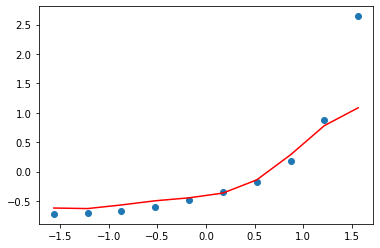

In [19]:
plt.scatter(x_scaler,y_scaler)
plt.plot(x_scaler,svr.predict(x_scaler),"r")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


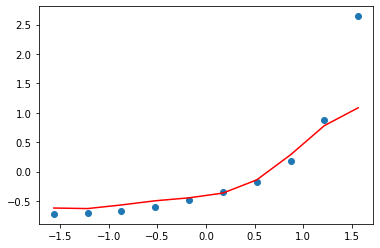

In [20]:
svr1=SVR(kernel="rbf")
svr1.fit(x_scaler,y_scaler)
plt.scatter(x_scaler,y_scaler)
plt.plot(x_scaler,svr1.predict(x_scaler),"r")

In [21]:
# tree
from sklearn.tree import DecisionTreeRegressor

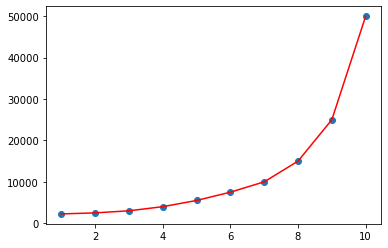

In [22]:
tree=DecisionTreeRegressor(random_state=0)
tree.fit(x,y)
plt.scatter(x,y)
plt.plot(x,tree.predict(x),"r")

In [23]:
tree.predict([[55.9]])

array([50000.])

In [24]:
y

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]], dtype=int64)

In [25]:
#Rassal ağac

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rassal=RandomForestRegressor(n_estimators=14,random_state=0)
rassal.fit(x,y)

C:\Users\SEFASZ~1\AppData\Local\Temp/ipykernel_19332/2804927358.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rassal.fit(x,y)


RandomForestRegressor(n_estimators=14, random_state=0)

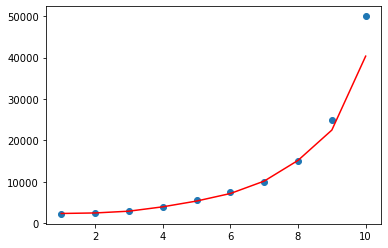

In [28]:
plt.scatter(x,y)
plt.plot(x,rassal.predict(x),"r")

In [29]:
rassal.predict([[5.5]])

array([5607.14285714])

In [30]:
#r_2 degeri kontrol

In [31]:
from sklearn.metrics import r2_score

In [43]:
print("Linear r2")
r2_score(y,lin_reg.predict(x))

Linear r2


0.6690412331929894

In [42]:
print("Poly r2 kontrol")
r2_score(y,lin_reg2.predict(lin_poly2.fit_transform(x)))

Poly r2 kontrol


0.9973922891706615

In [47]:
print("SVR r2 kontrol")
r2_score(y_scaler,svr.predict(x_scaler))

SVR r2 kontrol


0.7513836788854973

In [48]:
print("TREE r2 kontrol")
r2_score(y,tree.predict(x))

TREE r2 kontrol


1.0

In [49]:
print("Rassal tree r2 kontrol")
r2_score(y,rassal.predict(x))

Rassal tree r2 kontrol


0.9506866025701398